In [ ]:
!pip install deepface
!pip install face_recognition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2

/content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2


In [ ]:
import os
import cv2
import face_recognition
import matplotlib.pyplot as plt

from os import listdir
from google.colab.patches import cv2_imshow

In [ ]:
def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 240
  ratio = width /float(w)
  height = int(h * ratio)
  return cv2.resize(img,(width, height))

In [ ]:
known_encodings = []
know_names = []
know_dir = 'AnggotaKelas/'

for filename in listdir(know_dir):
    path = know_dir + filename
    img = read_img(path)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    know_names.append(filename.split('.')[0])


In [ ]:
unknow_dir = 'fotoTest/'
fig = plt.figure(figsize=(50,100))
z = 1

for filename in listdir(unknow_dir):
    path = unknow_dir + filename
    img = read_img(path)
    img_enc = face_recognition.face_encodings(img)[0]
    results = face_recognition.compare_faces(known_encodings, img_enc)
    distance = face_recognition.face_distance(known_encodings, img_enc)

    lowest = 1
    recognition = -1
    for i in range(len(results)):
      if (results[i]):
        if(distance[i] < lowest):
          predict = i
          lowest = distance[i]
          name = know_names[i]
    (top,right, bottom, left) =  face_recognition.face_locations(img)[0]

    if(lowest <= 0.44):
      color = (0, 255, 0)
    else:
      color = (0, 0, 255)
    cv2.rectangle(img,(left, top),(right,bottom), color, 2)
    # cv2.putText(img, name, (left, bottom + 20), cv2.FONT_HERSHEY_PLAIN, 1.0,(0, 0, 0), 1)
    # print(name + '-' +str(lowest))
    # cv2_imshow(img)
    fig.add_subplot(10,5,z)
    z += 1
    plt.title(name + '-' +str(round(lowest,3)), fontsize=36)
    plt.imshow(img[:,:,::-1])
    plt.axis('off')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(know_names)
print(distance)

['Varulianto Dear', 'Mohamad Idris', 'Rahman Indra Kesuma', 'Yulrio Brianorman', 'Kemas Muhammad Irsan Riza', 'Lathifah Arief', 'Adiyasa Nurfalah', 'M Khaerul Naim', 'Sulthoni Ashiddiiqi', 'Hartanto Tantriawan', 'Imam Ekowicaksono', 'Riyanto', 'Ahmad Luky Ramdani', 'Yaya Setiyadi', 'Leni Fitriani', 'Reza Budiawan', 'Handoko Supeno', 'Arief Sartono', 'Meredita Susanty', 'Mina Ismu Rahayu', 'Andik Wijanarko', 'Baud Prananto', 'Dewi Tresnawati', 'Meza Silvana']
[0.60909157 0.62586423 0.68027202 0.6436709  0.74165755 0.72135212
 0.59617325 0.61489845 0.66947105 0.65457386 0.61312791 0.60784872
 0.68897774 0.57530047 0.72175532 0.62952825 0.         0.60823501
 0.63755724 0.65127097 0.70322314 0.53057142 0.75413173 0.72949847]


Yulrio Brianorman-0.14636263582703135


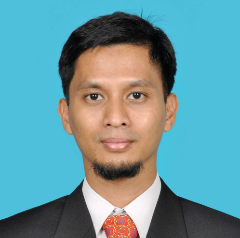

In [ ]:
img = read_img('fotoTest/yulrio.jpg')
img_enc = face_recognition.face_encodings(img)[0]
results = face_recognition.compare_faces(known_encodings, img_enc)
distance = face_recognition.face_distance(known_encodings, img_enc)
lowest = 1
recognition = -1
for i in range(len(results)):
  if (results[i]):
    if(distance[i] < lowest):
      predict = i
      lowest = distance[i]
      name = know_names[i]
      print(name + '-' +str(lowest))
    # (top,right, bottom, left) =  face_recognition.face_locations(img)[0]
    # face_recognition.face_locations(img)[0]
    # cv2.rectangle(img,(left, top),(right,bottom), (0, 0, 255), 2)
    # cv2.putText(img, name, (left + 2, bottom + 2), cv2.FONT_HERSHEY_PLAIN, 0.8,
                # (255, 255, 255), 1)
cv2_imshow(img)